# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Глушанина Мария Евгеньевна

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [4]:
## your code here ##
import sklearn.datasets

data = sklearn.datasets.fetch_openml('mnist_784', version=1, cache=True, return_X_y=True)
labels = data[1].values
images = data[0].values

X_train, X_test = images[:60000], images[60000:]
y_train, y_test = labels[:60000], labels[60000:]

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [8]:
## your code here ##
import pandas as pd
import numpy as np
import time
import random

algo_list = ['kd_tree', 'ball_tree', 'brute','my_own']
df_time = pd.DataFrame(columns=['algo', 'pixels', 'pred_time'])
pixels = [10, 20, 100]

for algorithm in algo_list:
    for pixel in pixels:

        randomlist = sorted(random.sample(range(0, 783), pixel))

        clf = BatchedKNNClassifier(n_neighbors=5, algorithm=algorithm, batch_size=1500)

        clf.fit(X_train[:, randomlist].astype('int'), y_train.astype('int'))

        start_time = time.monotonic()
        ditances, indices = clf.kneighbors(X=X_train[:, randomlist], return_distance=True)
        predict_time = time.monotonic() - start_time

        y_pred = clf.predict(X_test[:, randomlist].astype('int'))
        
        new_line = [algorithm, pixel, predict_time]
        df_time.loc[len(df_time)] = new_line
        
        print('algorithm:', algorithm, 'n_pixels:', pixel, 'time:', predict_time)

algorithm: kd_tree n_pixels: 10 time: 6.048458728000014
algorithm: kd_tree n_pixels: 20 time: 22.486014940000018
algorithm: kd_tree n_pixels: 100 time: 663.0467139879999
algorithm: ball_tree n_pixels: 10 time: 9.950118019000001
algorithm: ball_tree n_pixels: 20 time: 79.5483901980001
algorithm: ball_tree n_pixels: 100 time: 550.759455918
algorithm: brute n_pixels: 10 time: 50.63213235400008
algorithm: brute n_pixels: 20 time: 59.75646571800007
algorithm: brute n_pixels: 100 time: 71.7927651330001
algorithm: my_own n_pixels: 10 time: 62.95901667499993
algorithm: my_own n_pixels: 20 time: 63.48112138899978
algorithm: my_own n_pixels: 100 time: 77.44568841299997


#### Приведите график / таблицу с результатами вашего эксперимента

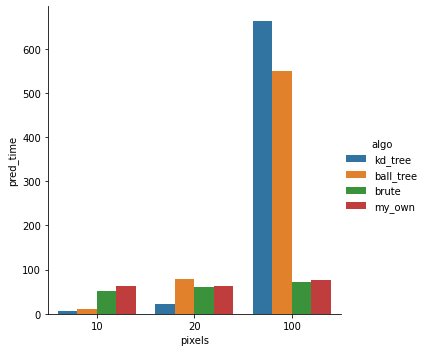

In [14]:
## your graphic / table here ##
import seaborn as sns

sns.catplot(data=df_time, x="pixels", y="pred_time", hue="algo", kind='bar')

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   Быстрее всего сработал алгоритм 'brute', он как и алгоритм 'my_own' были достаточно стабильны по времени на всем количестве признаков. Результаты работы kd-tree были более ожидаемыми - он действительно хорошо работал на меньшем количестве признаков, но стал работать сильно хуже в пространстве с большей размерностью. Немного неожиданным оказалось то, что быстрее всех сработал brute, так как по идее он должен расти по времени быстрее. Скорее всего, за счет более подходящей к нему структуры данных он сработал лучше. 

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

  brute и my_own: O(k * n * d) - вычисление расстояний от n точек k раз в d измерениях 
  kd_tree: O(d * n * log(n)) - вычисление расстояний для n точек в d измерениях и log(n) высоту дерева 
  ball_tree: O(d * n * log(n)) - аналогично kd_tree 

  На практике kd tree и ball tree действительно работали примерно одинаково. Возможно даже логично то, что brute сработал быстрее - для kd_tree и ball tree не так важно количество соседей, которое было константным для всех алгоритмов и следовательно не увеличивало время brute. И так как k одинаковое во всех алгоритмах, то brute оказывается быстрее за счёт отсутствия log(n). Потенциально на большем k алгоритмы kd_tree и ball_tree сработали бы лучше. 


3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

  Быстрее всего показал себя алгоритм 'brute', так что его и стоит использовать. Кроме того, при предсказывании расстояний для всех пикселей, алгоритмы основанные на деревьях будут работать ещё медленнее.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [22]:
## your code here ##
from sklearn.model_selection import KFold

cv = KFold(n_splits = 3)
k_list = list(range(1,11))
cv_knn_euc = knn_cross_val_score(images.astype('int'), labels.astype('int'), k_list=k_list, scoring = 'accuracy', 
                             cv=cv, algorithm = 'brute', metric = 'euclidean',
                              batch_size=1500)

cv_knn_cos = knn_cross_val_score(images.astype('int'), labels.astype('int'), k_list=k_list, scoring = 'accuracy', 
                             cv=cv, algorithm = 'brute', metric = 'cosine',
                              batch_size=1500)

In [23]:
euc_scores = np.array([np.mean(x) for x in cv_knn_euc.values()])
cos_scores = np.array([np.mean(x) for x in cv_knn_cos.values()])


#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

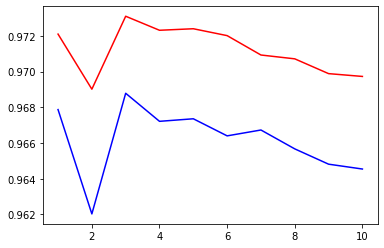

In [24]:
sns.lineplot(x=k_list, y=euc_scores, color='blue')
sns.lineplot(x=k_list, y=cos_scores, color='red')



#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Оптимальнее косинусная метрика расстояния и 3 ближайших соседа, так как именно на них достигается лучший score.  


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

   Немного лучше себя показала косинусная метрика, потому что косинусное расстояние - это (1-вычесть косинусное подобие). Так как метрика оценивает подобие, то в алгоритме на поиск схожих паттернов, она покажет себя лучше. 
    
   
3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

  Да, выбросы есть на втором соседе. Это связано с тем, что если два соседа предсказывают разные классы, то будет выбран меньший из них, при том что реальный класс может быть вторым. Эту же тенденцию можно заметить и при четырёх соседях. При трёх соседях есть однозначное решение какой класс более вероятный. 

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [31]:
## your code here ##
cos_score_dis = knn_cross_val_score(images.astype('int'), labels.astype('int'), k_list=k_list, scoring='accuracy', cv=cv, algorithm='brute',
                                    metric='cosine', weights='distance', batch_size=1500)
cos_score_dis_mean = [np.mean(x) for x in cos_score_dis.values()]

#### Нарисуйте график зависимости точности от количества соседей 

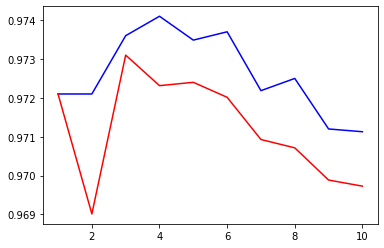

In [33]:
## your graphic here ##
sns.lineplot(x=np.arange(10) + 1, y=cos_score_dis_mean, color='blue')
sns.lineplot(x=np.arange(10) + 1, y=cos_scores, color='red')


#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   Наиболее удачными будет k=4, так как именно на нём наилучший accuracy_score. 


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

  Во взвешенном алгоритме результаты лучше. Можно заметить, что в отличие от невзвешенного алгоритма, лучшее количество соседей не 3, а 4. Проблема с чётным голосованием решается взвешенностью соседей. Кроме того, в целом взвешенная оценка будет более точной. 

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [39]:
## your code here ##
clf = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance', batch_size=1500)

clf.fit(X_train.astype('int'), y_train.astype('int'))
y_pred = clf.predict(X_test.astype('int'))

print('Качество на кросс-валидации:', np.mean(cos_score_dis_mean))
print('Качество на тесте:', sklearn.metrics.accuracy_score(y_test.astype('int'), y_pred))

Качество на кросс-валидации: 0.972609981621736
Качество на тесте: 0.9752


Можно заметить, что среднее качество на кросс-валидации чуть выше чем на тесте, что может значить, что какое-то конкретное разделение даёт чуть лучшее качество, чем при передаче конкретного разбиения на трейн и тест. 

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

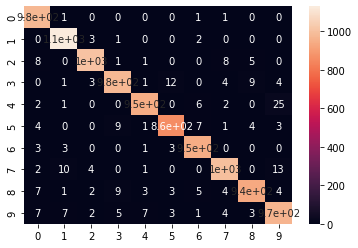

In [ ]:
## your code here ##
cf_df = sklearn.metrics.confusion_matrix(y_test.astype('int'), y_pred)

sns.heatmap(cf_df, annot=True)


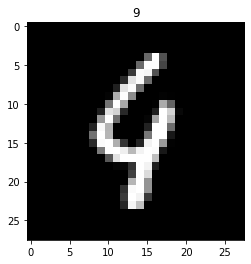

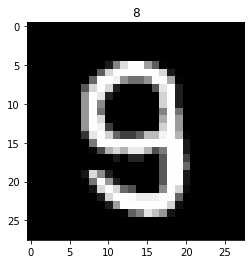

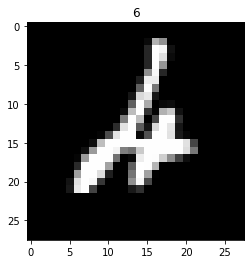

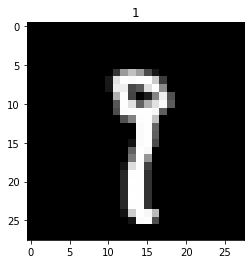

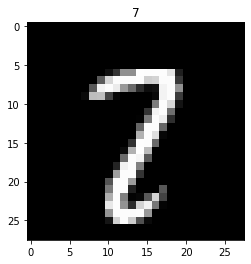

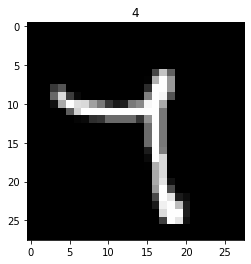

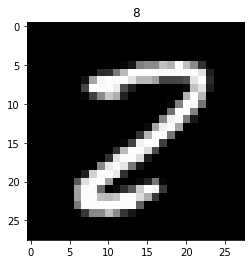

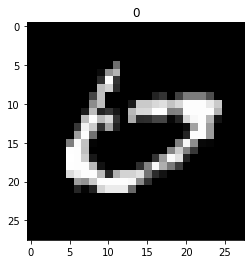

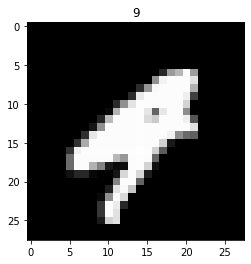

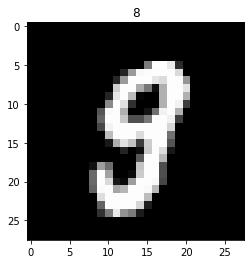

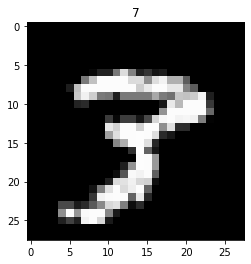

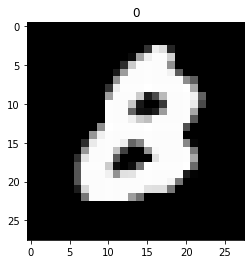

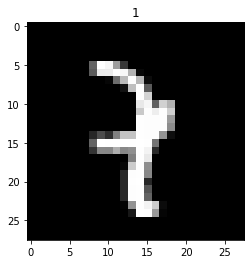

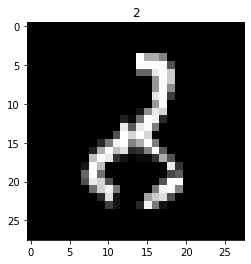

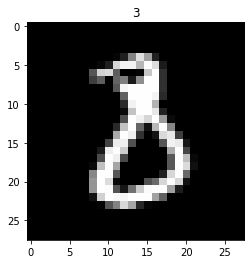

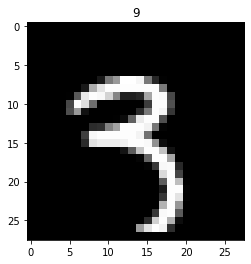

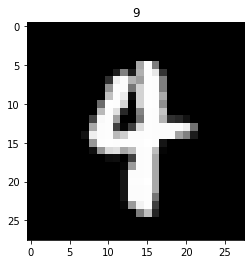

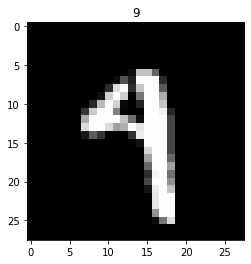

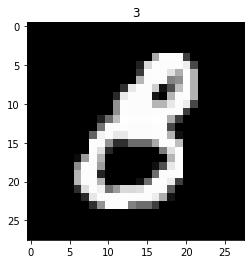

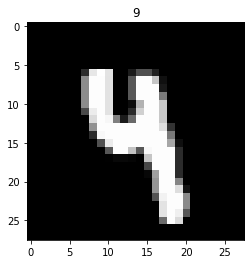

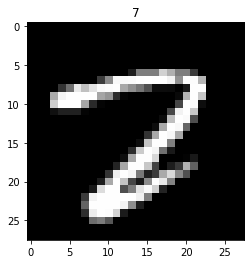

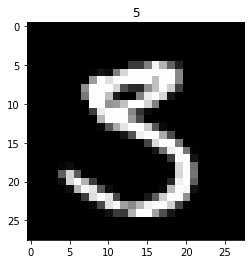

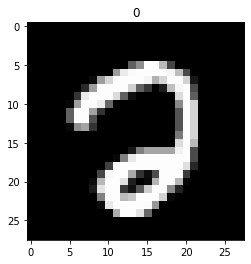

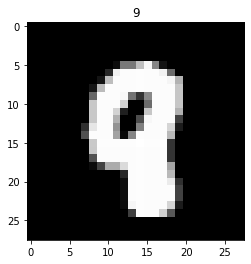

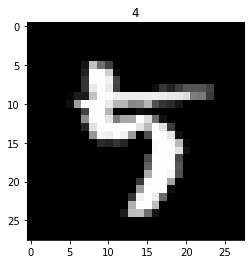

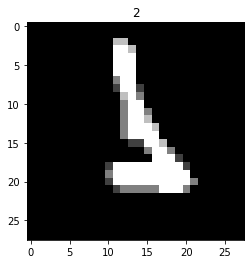

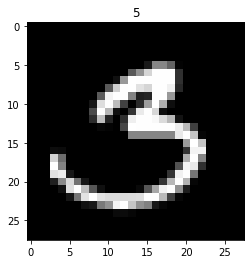

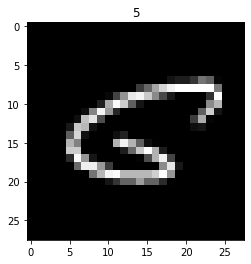

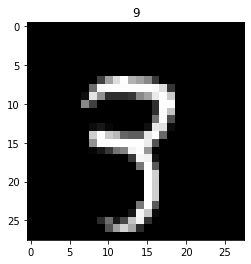

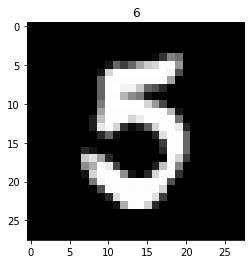

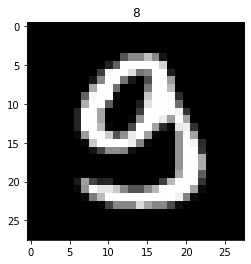

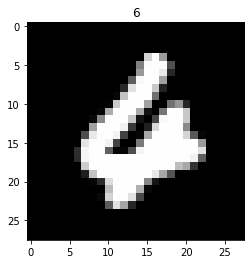

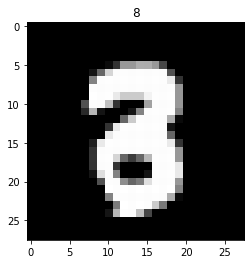

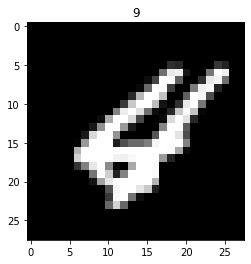

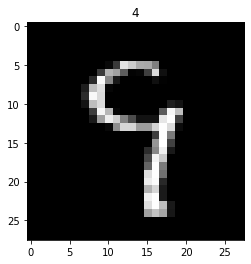

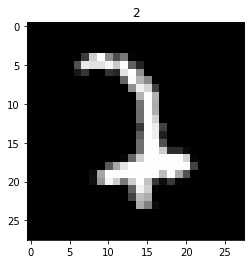

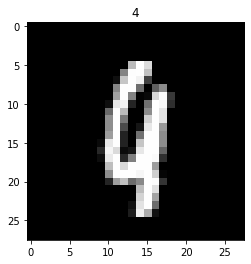

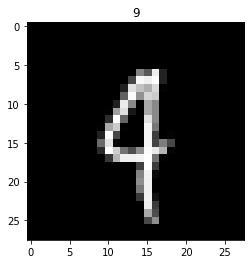

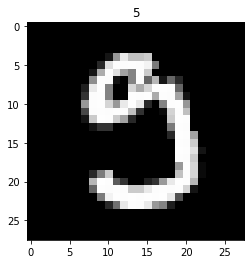

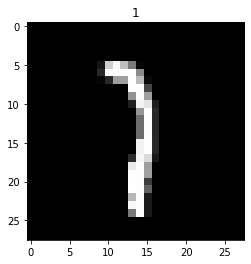

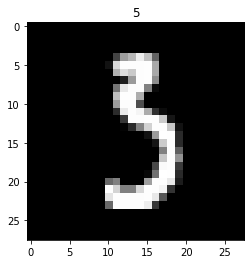

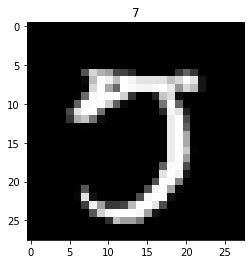

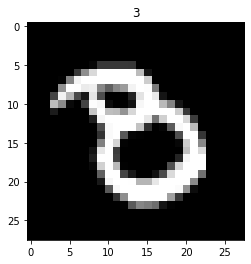

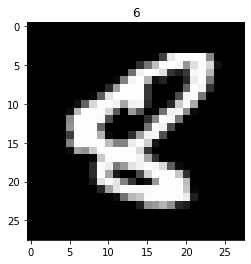

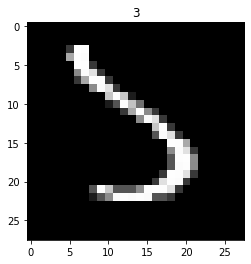

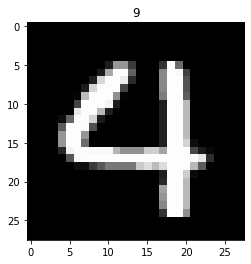

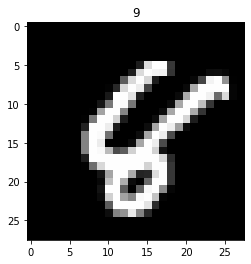

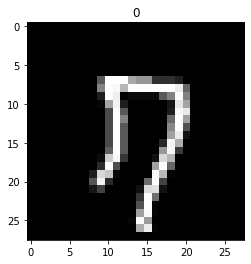

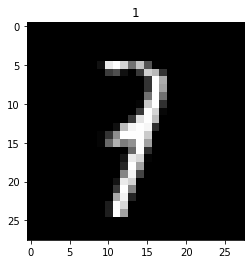

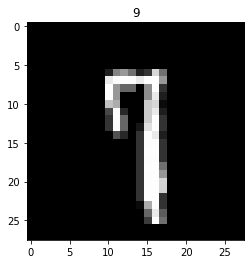

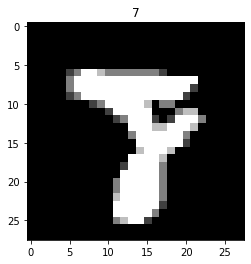

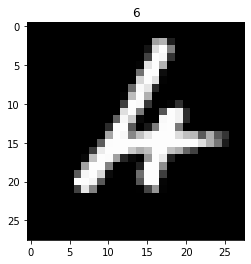

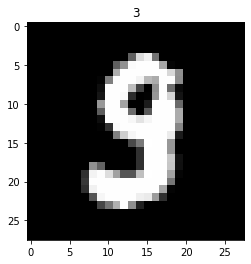

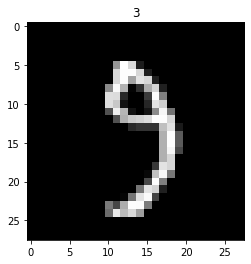

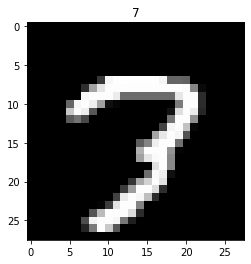

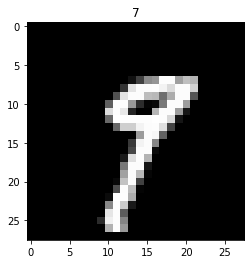

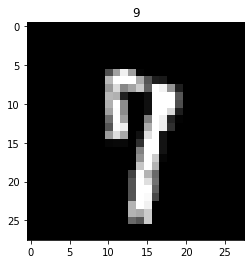

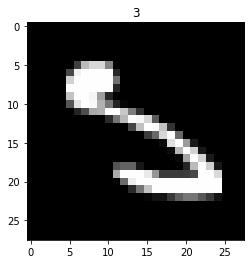

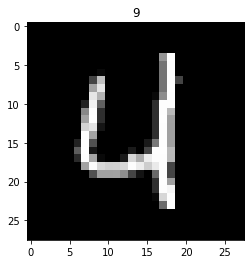

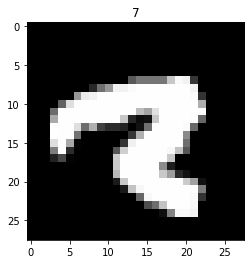

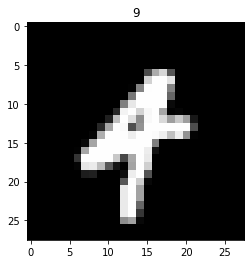

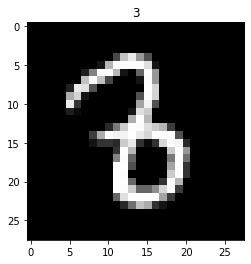

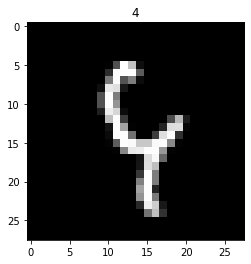

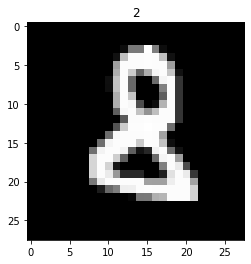

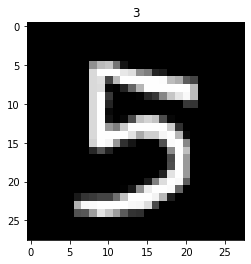

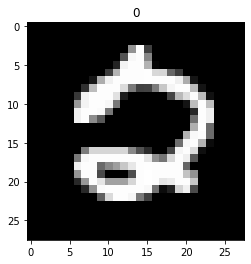

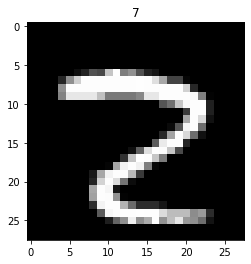

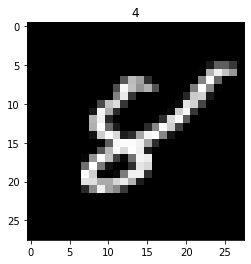

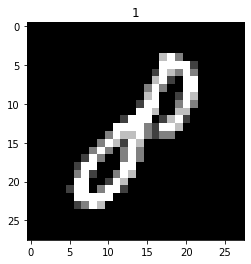

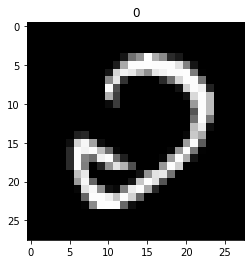

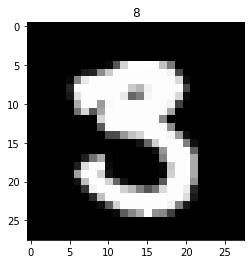

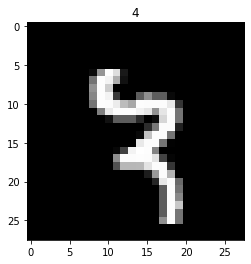

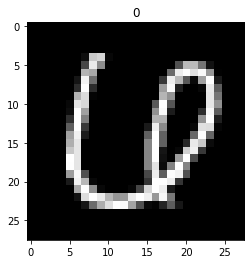

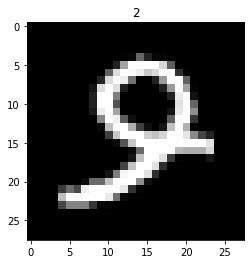

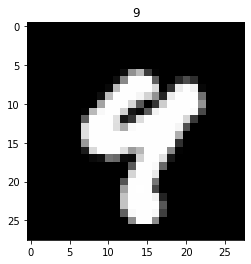

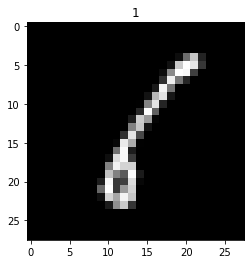

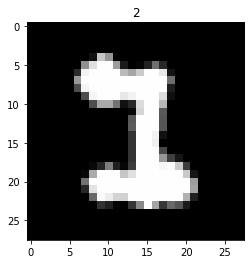

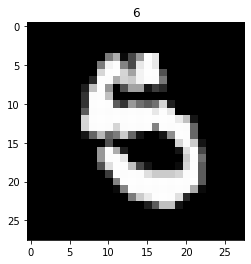

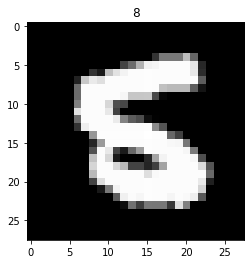

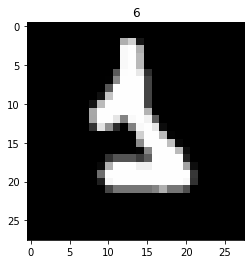

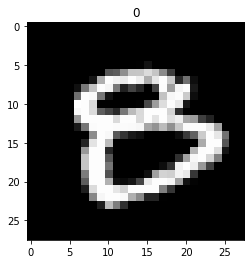

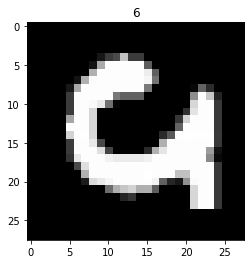

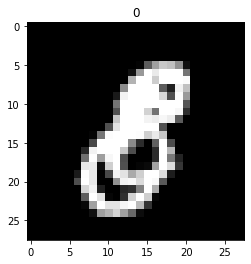

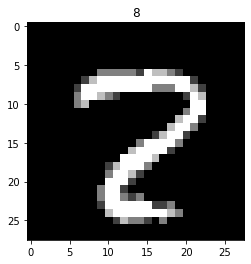

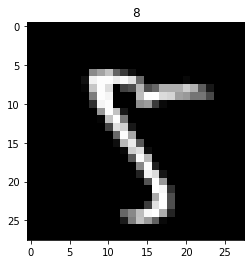

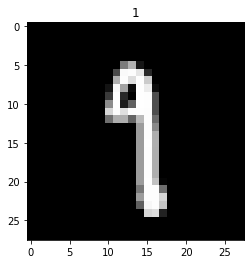

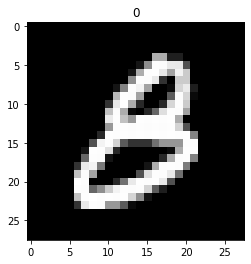

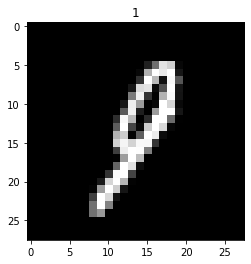

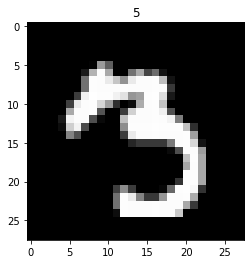

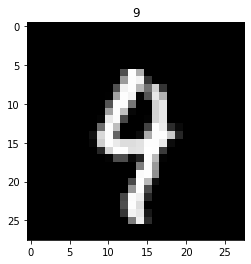

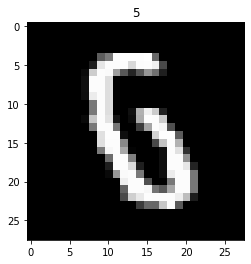

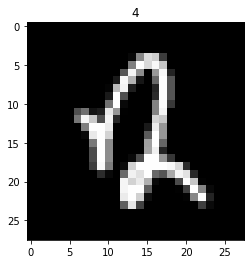

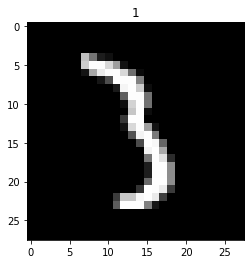

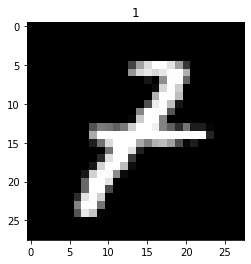

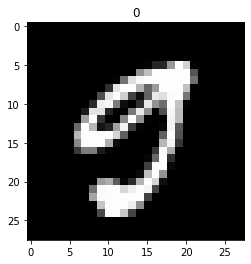

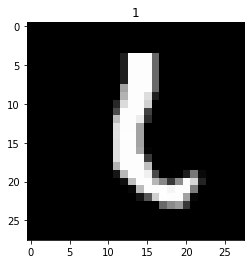

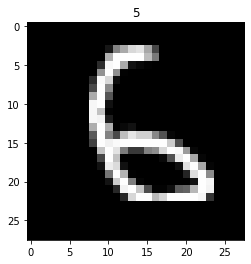

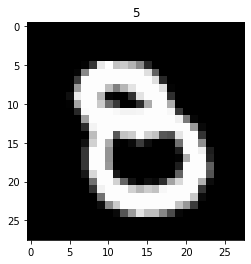

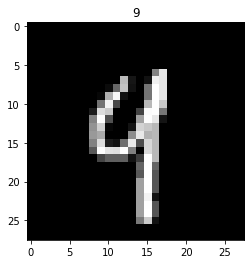

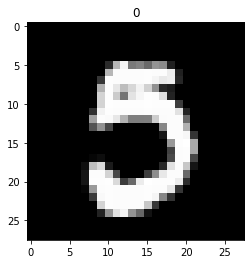

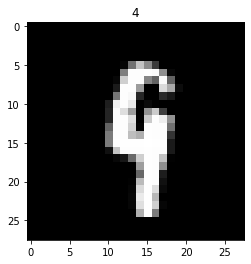

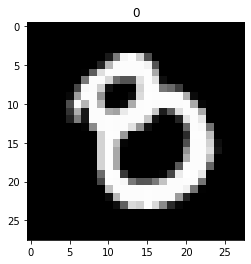

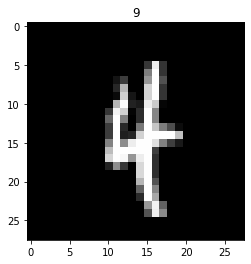

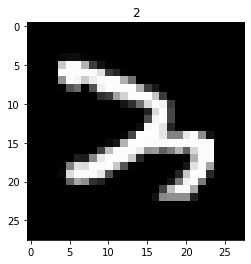

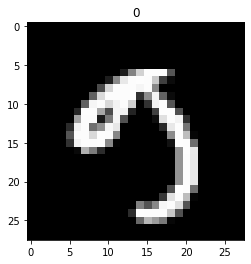

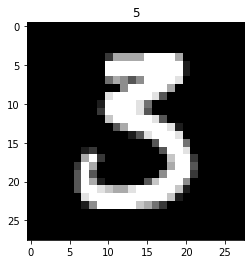

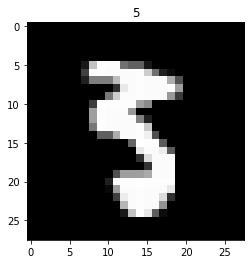

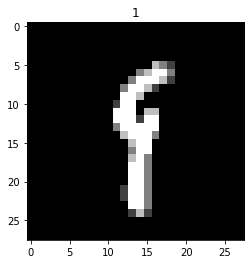

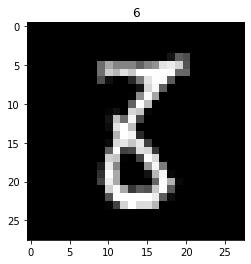

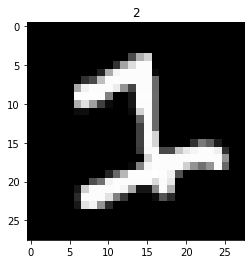

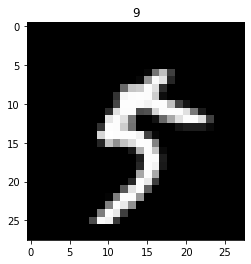

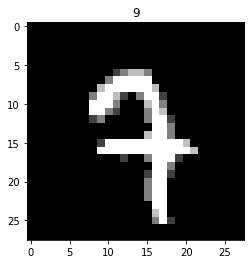

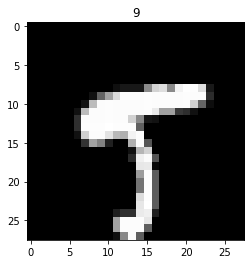

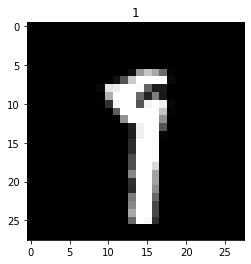

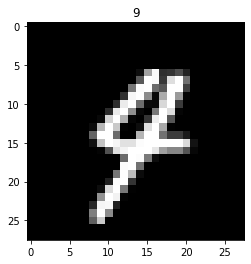

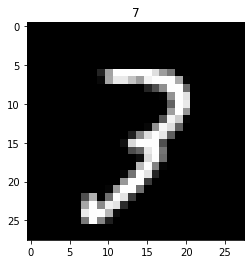

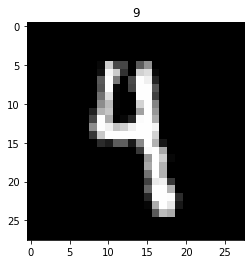

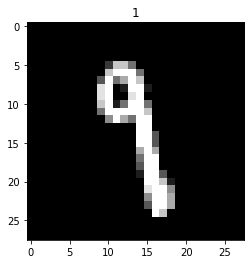

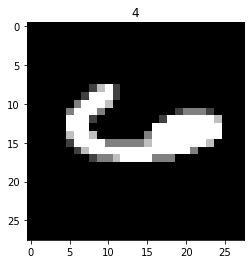

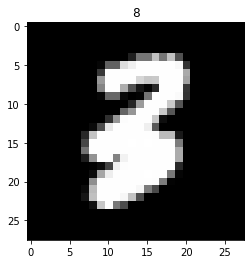

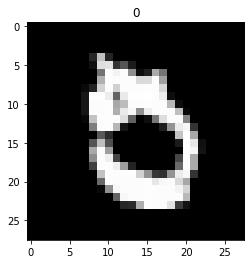

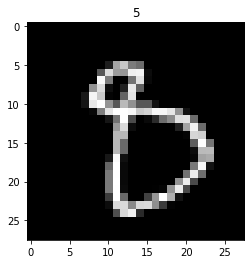

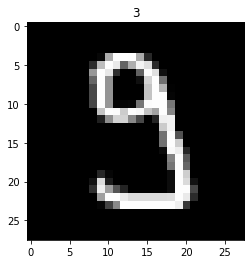

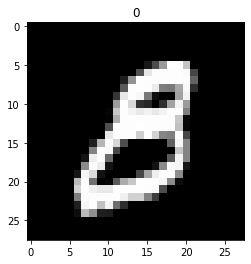

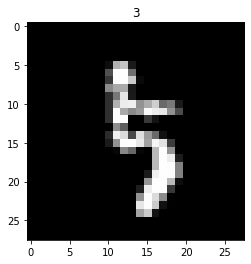

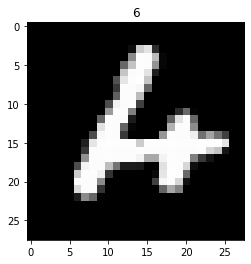

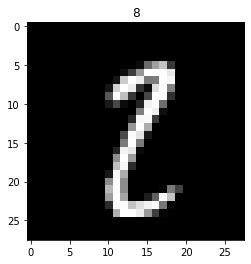

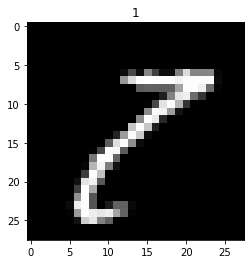

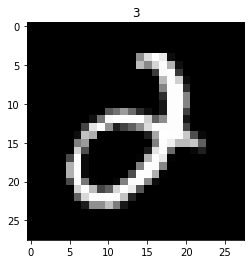

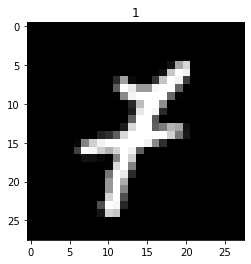

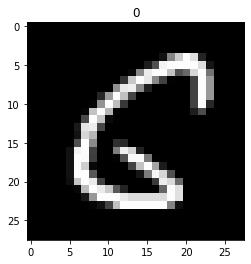

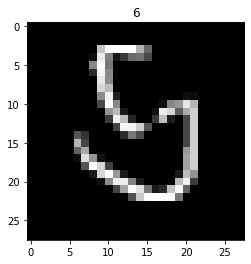

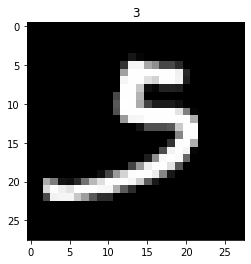

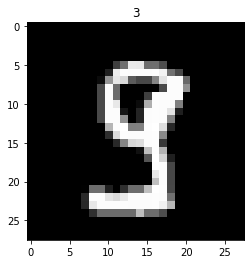

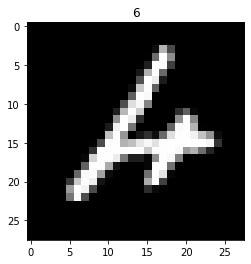

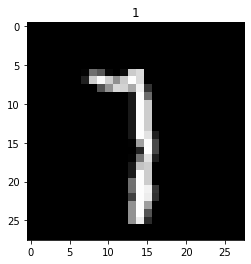

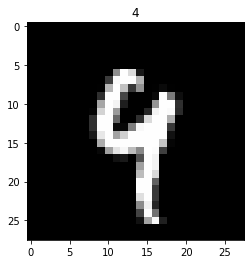

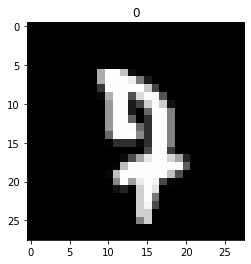

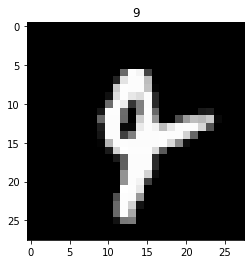

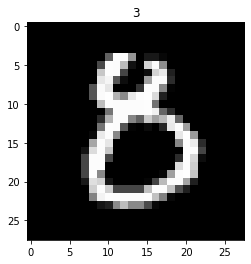

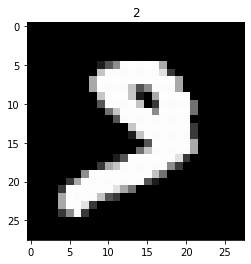

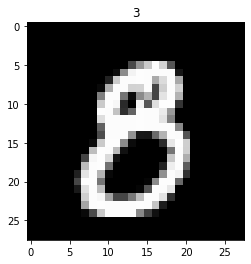

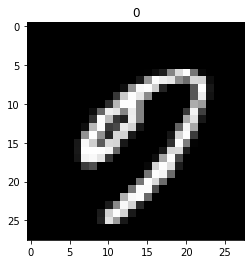

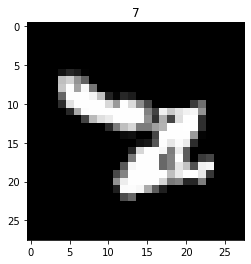

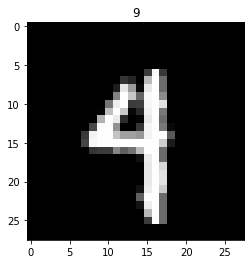

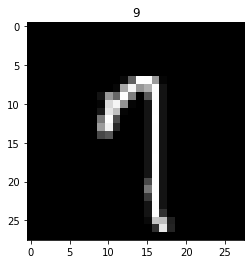

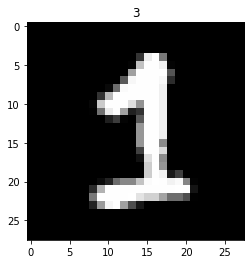

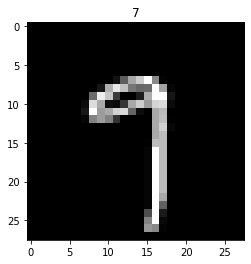

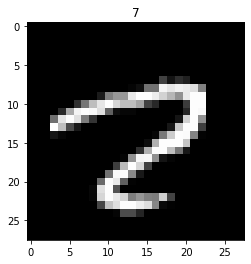

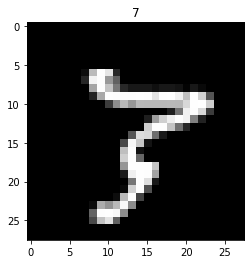

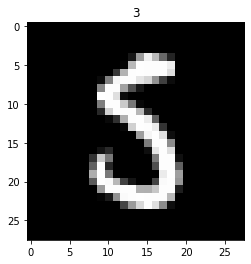

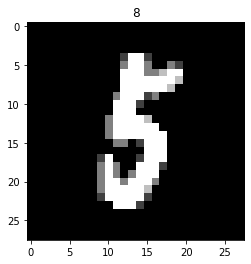

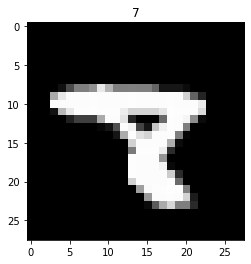

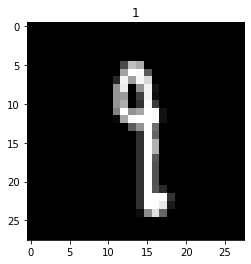

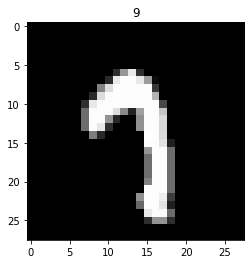

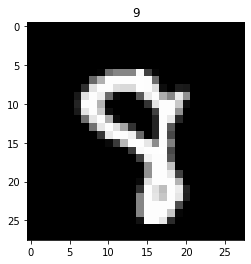

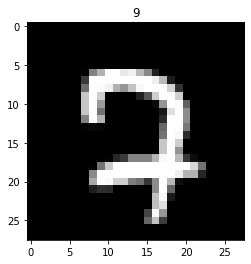

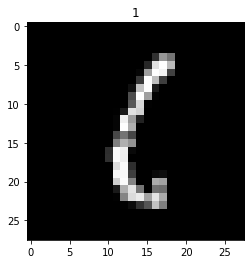

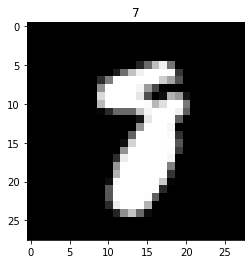

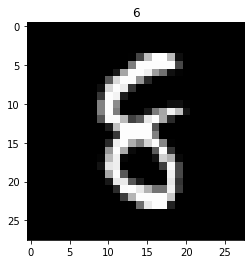

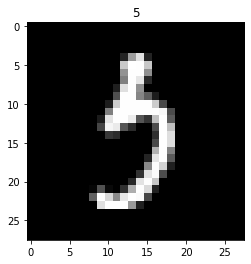

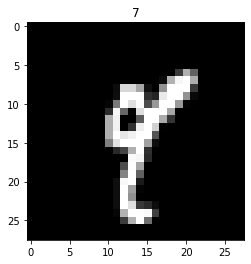

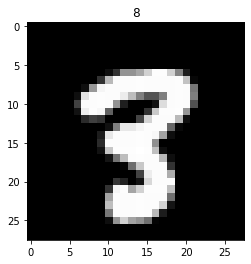

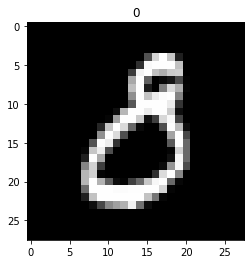

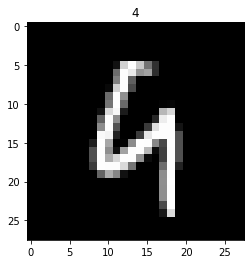

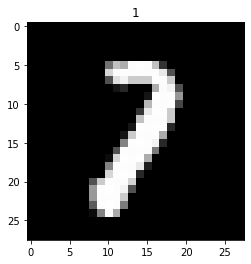

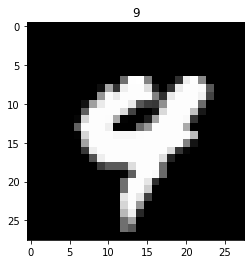

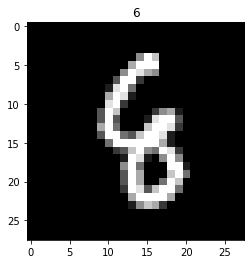

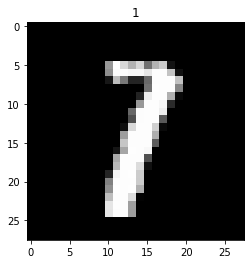

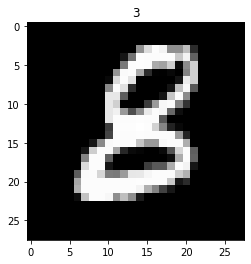

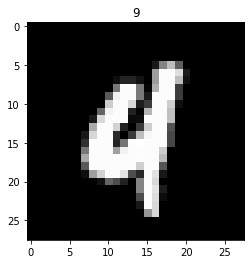

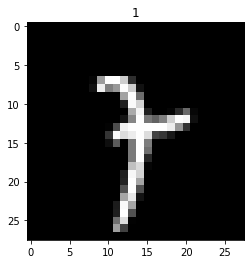

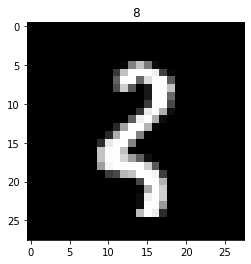

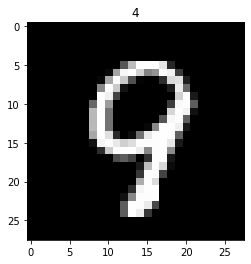

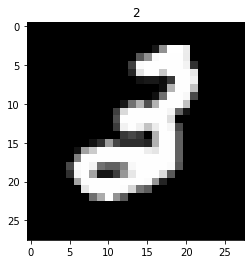

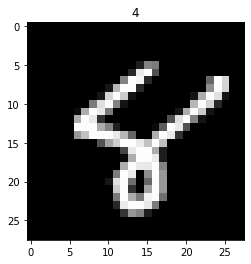

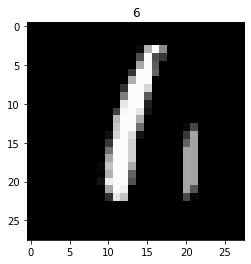

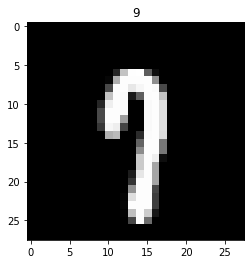

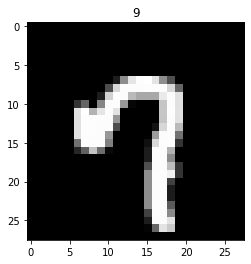

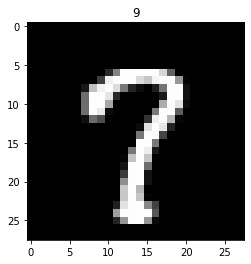

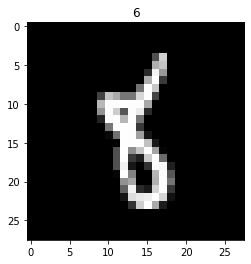

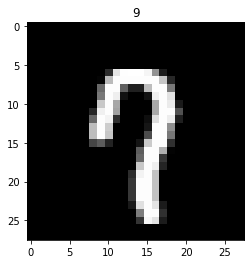

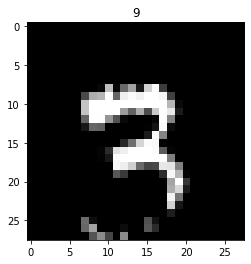

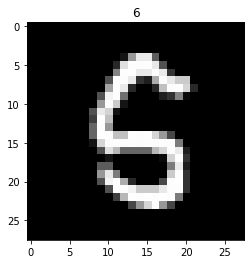

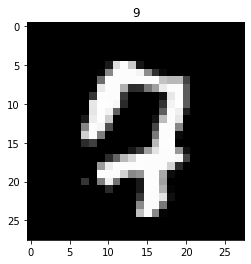

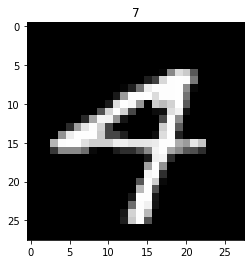

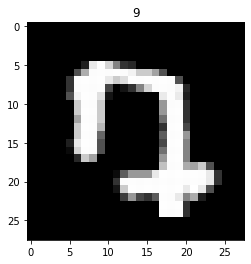

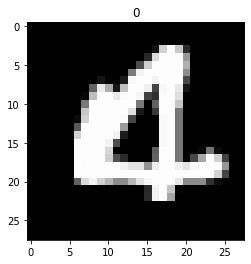

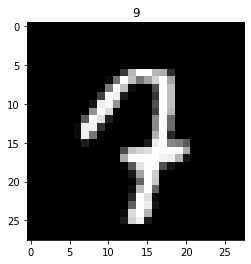

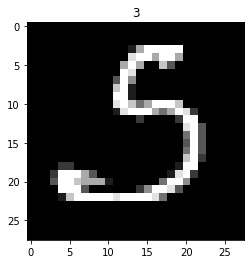

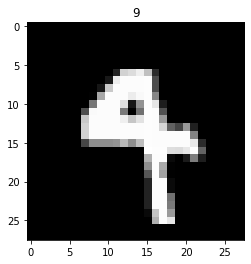

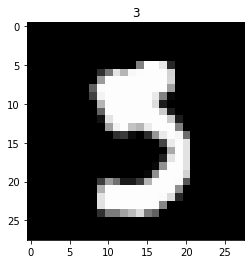

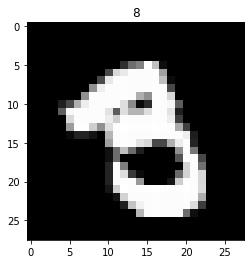

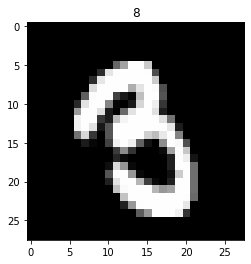

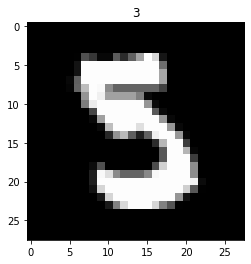

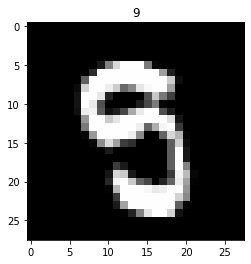

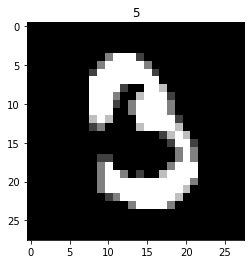

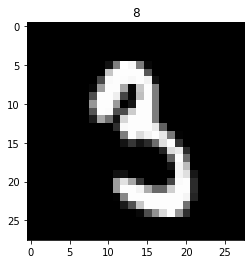

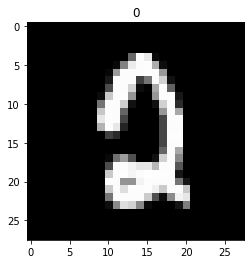

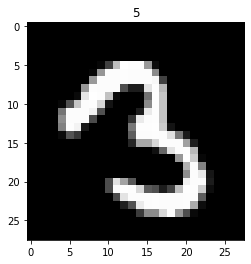

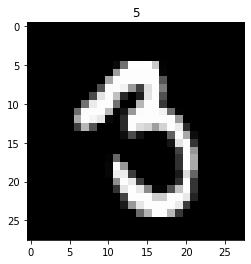

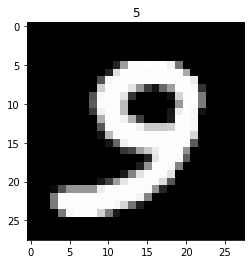

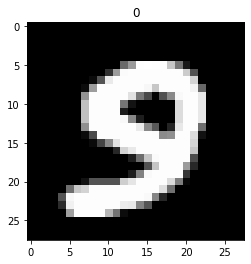

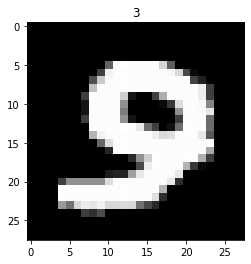

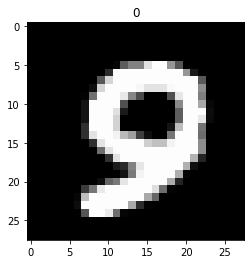

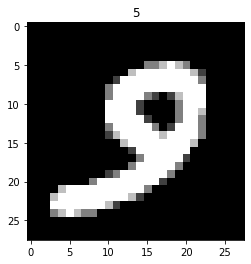

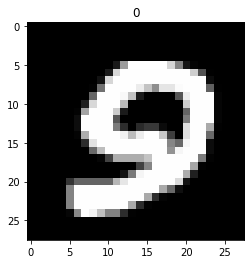

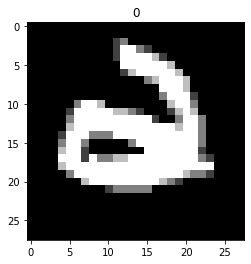

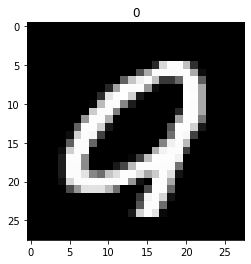

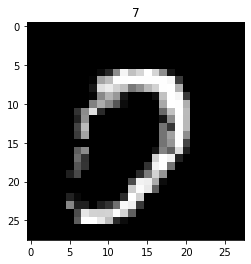

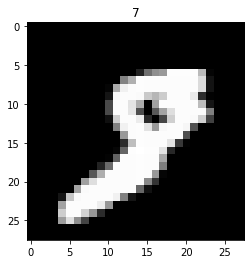

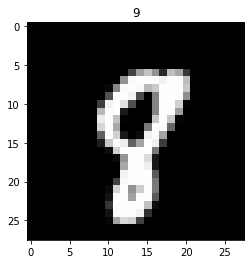

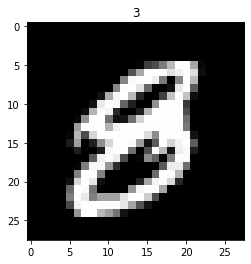

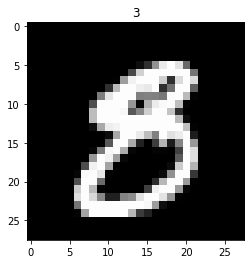

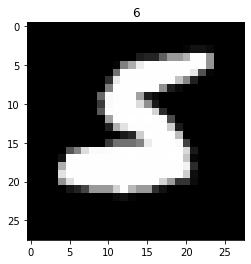

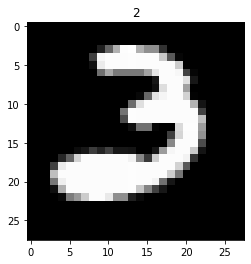

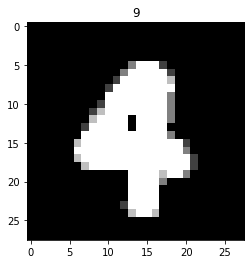

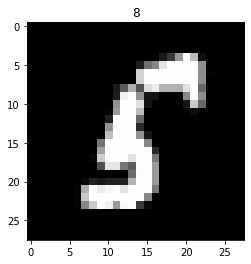

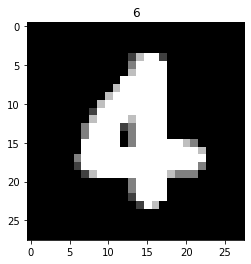

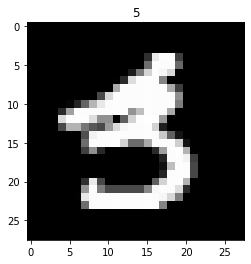

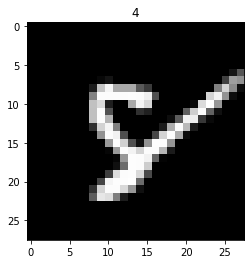

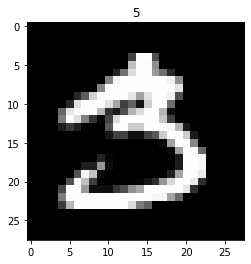

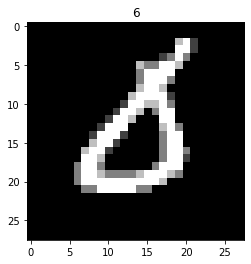

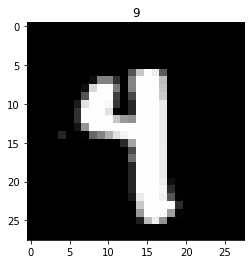

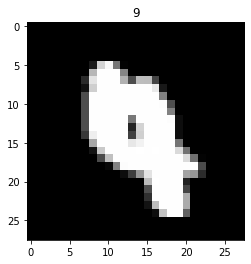

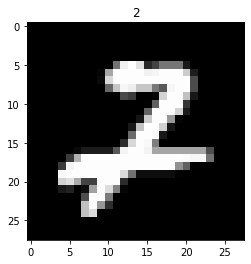

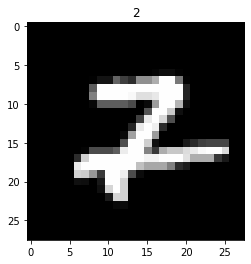

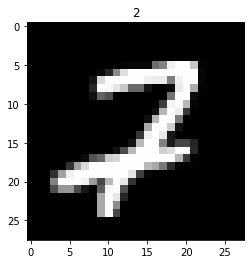

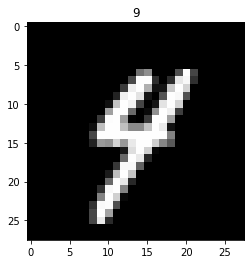

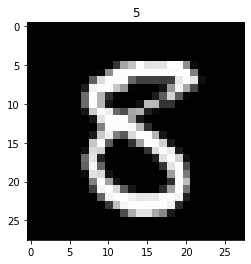

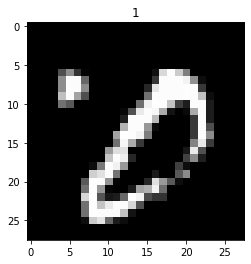

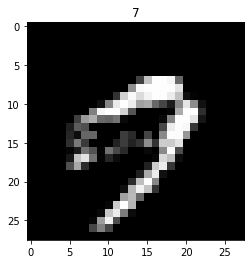

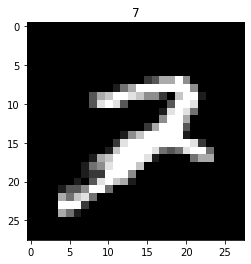

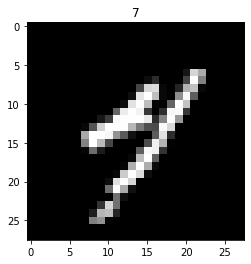

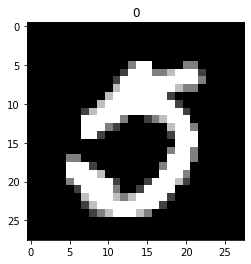

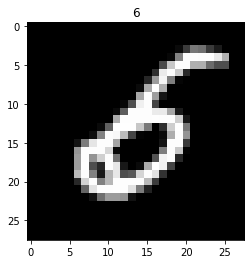

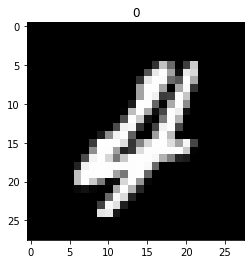

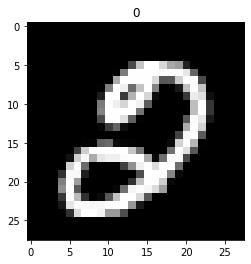

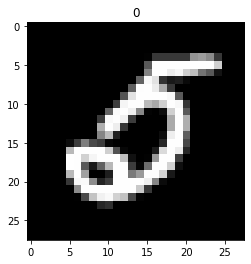

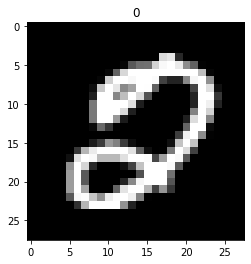

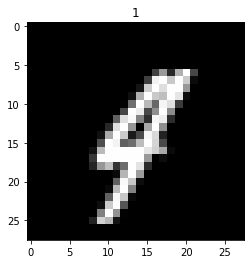

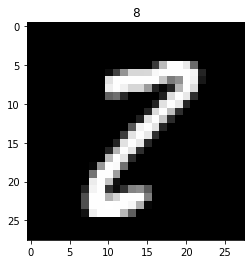

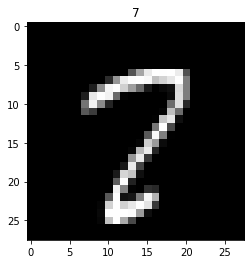

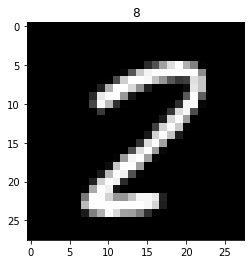

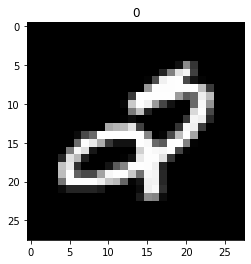

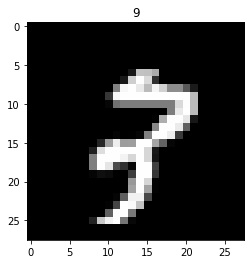

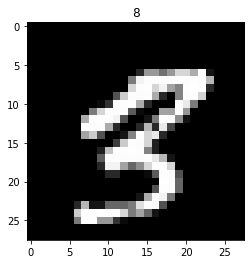

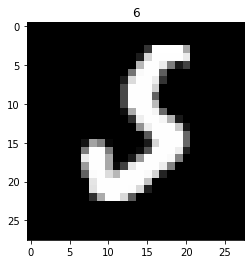

In [ ]:
for input, prediction, label in zip(X_test.astype('int'), list(y_pred), list(y_test.astype('int'))):
  if prediction != label:
    plt.imshow(input.reshape((28, 28)), cmap='gray')
    plt.title(prediction)
    plt.show()

По большей части неправильно были классифицированы объекты, у которых при дорисовке небольшого количества точек можно получить предсказываемый объект. То есть в целом картинка на какую-то значительную часть похожа на предсказываемую из-за чего алгоритм путается. 

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [ ]:
## your code here ##

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*